In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as smf
from datetime import datetime

sui = pd.read_excel('SC Suicide Stats.xlsx', header = 0)
sui.fillna(0, inplace = True)

sui.describe()
sui.info()
sui.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 11 columns):
Edition         371 non-null int64
Report_Type     371 non-null object
Measure_Name    371 non-null object
State_Name      371 non-null object
Rank            371 non-null float64
Value           371 non-null float64
Score           371 non-null float64
Lower_CI        371 non-null float64
Upper_CI        371 non-null float64
Source          371 non-null object
Source_Year     371 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 32.0+ KB


,Edition,Report_Type,Measure_Name,State_Name,Rank,Value,Score,Lower_CI,Upper_CI,Source,Source_Year
0,2019,2019 Annual,Adverse Childhood Experiences,South Carolina,23.0,20.9,0.12,24.3,17.6,"U.S. HHS, HRSA, Maternal and Child Health Bure...",2016-2017
1,2019,2019 Annual,Disconnected Youth,South Carolina,35.0,12.3,0.30,0.0,0.0,"Measure of America, Youth Disconnection Report",2017
2,2019,2019 Annual,Drug Deaths,South Carolina,23.0,18.0,-0.14,18.7,17.3,"CDC WONDER Online Database, Underlying Cause o...",2015-2017
3,2019,2019 Annual,Drug Deaths - Ages 15-24,South Carolina,0.0,9.8,0.00,11.1,8.4,"CDC WONDER Online Database, Underlying Cause o...",2015-2017
4,2019,2019 Annual,Drug Deaths - Ages 25-34,South Carolina,21.0,29.0,0.00,31.3,26.6,"CDC WONDER Online Database, Underlying Cause o...",2015-2017


In [21]:
sui.tail()

,Edition,Report_Type,Measure_Name,State_Name,Rank,Value,Score,Lower_CI,Upper_CI,Source,Source_Year
366,2015,2015 Annual,Suicide - Female,South Carolina,0.0,5.8,0.00,6.8,4.9,"CDC WONDER Online Database, Underlying Cause o...",2013
367,2015,2015 Annual,Suicide - Hispanic,South Carolina,0.0,0.0,0.00,11.6,3.8,"CDC WONDER Online Database, Underlying Cause o...",2013
368,2015,2015 Annual,Suicide - Male,South Carolina,0.0,24.1,0.00,26.1,22.0,"CDC WONDER Online Database, Underlying Cause o...",2013
369,2015,2015 Annual,Suicide - White,South Carolina,0.0,18.3,0.00,19.8,16.9,"CDC WONDER Online Database, Underlying Cause o...",2013
370,2015,2015 Annual,"Unemployment Rate, Annual",South Carolina,32.0,6.4,0.16,0.0,0.0,"U.S. Department of Labor, Bureau of Labor Stat...",2014


In [22]:
# Data Cleansing
filt = ['Rank', 'Value', 'Score','Lower_CI', 'Upper_CI']
filt2 = ['Edition', 'Measure_Name', 'Value']

rl = sui[filt].rolling(window = 30).std()
rl.dropna(inplace = True)

print(rl)

          Rank        Value     Score     Lower_CI     Upper_CI
29   16.087977     9.275652  0.435145    10.674926     8.870450
30   16.496081     9.186973  0.436449    10.599005     8.814383
31   16.435209     9.362219  0.446151    10.295345     8.707693
32   16.981430     9.498218  0.486253    10.464610     8.768711
33   17.179545     9.461907  0.526869    10.410669     8.737700
..         ...          ...       ...          ...          ...
366  17.642034  1566.642709  0.416481  1586.741581  1546.294713
367  17.567767  1566.700039  0.415660  1586.737130  1546.314524
368  17.750538  1566.578601  0.359787  1586.609299  1546.199886
369  17.897569  1566.509595  0.353164  1586.537283  1546.132164
370  17.460662  1566.583746  0.331594  1586.663490  1546.238017

[342 rows x 5 columns]


In [29]:
sui.columns

sui.Measure_Name.unique()

array(['Adverse Childhood Experiences', 'Disconnected Youth',
       'Drug Deaths', 'Drug Deaths - Ages 15-24',
       'Drug Deaths - Ages 25-34', 'Drug Deaths - Ages 35-44',
       'Drug Deaths - Ages 45-54', 'Drug Deaths - Ages 55-64',
       'Drug Deaths - Ages 65-74',
       'Drug Deaths - American Indian/Alaska Native',
       'Drug Deaths - Asian/Pacific Islander',
       'Drug Deaths - Black/African American', 'Drug Deaths - Female',
       'Drug Deaths - Hispanic/Latino', 'Drug Deaths - Male',
       'Drug Deaths - White', 'Frequent Mental Distress',
       'Frequent Mental Distress - $25-$49,999',
       'Frequent Mental Distress - $50-$74,999',
       'Frequent Mental Distress - $75,000 or More',
       'Frequent Mental Distress - Ages 18-44',
       'Frequent Mental Distress - Ages 45-64',
       'Frequent Mental Distress - Ages 65+',
       'Frequent Mental Distress - American Indian/Alaskan Native',
       'Frequent Mental Distress - Asian',
       'Frequent Mental Distres

Unemployment has been decreasing significantly over the past 5 years. This makes it unlikely that job loss was a high contributer to suicide. It actually has an inverse relationship with the suicide data. Suicide was increasing and unemployment was decreasing.


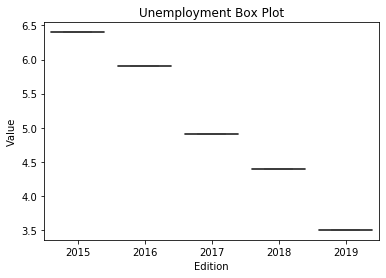

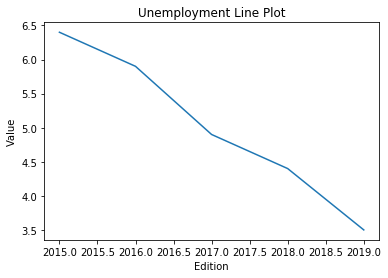

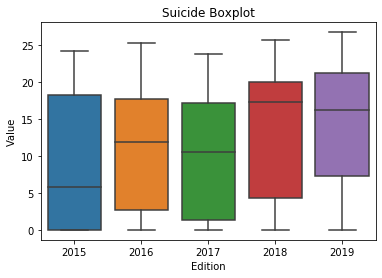

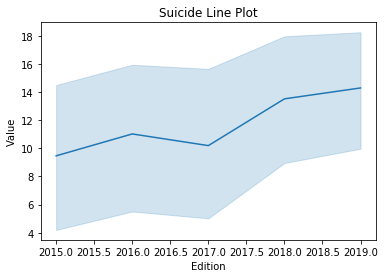

In [23]:
# Economics

suicide_datalist = ['Suicide - Ages 25-34', 'Suicide - Ages 35-44',
       'Suicide - Ages 45-54', 'Suicide - Ages 55-64',
       'Suicide - Ages 65-74', 'Suicide - Ages 75-84',
       'Suicide - Ages 85+', 'Suicide - American Indian/Alaskan Native',
       'Suicide - Asian', 'Suicide - Black', 'Suicide - Female',
       'Suicide - Hispanic', 'Suicide - Male', 'Suicide - White', 'Suicide', 'Suicide - Ages 15-24']

econ_datalist = ['Unemployment Rate, Annual']

econ = sui[filt2][sui.Measure_Name.isin(econ_datalist)]

suicide = sui[filt2][sui.Measure_Name.isin(suicide_datalist)]

print("Unemployment has been decreasing significantly over the past 5 years. This makes it unlikely that job loss was a high contributer to suicide. It actually has an inverse relationship with the suicide data. Suicide was increasing and unemployment was decreasing.")

plt.title("Unemployment Box Plot")
sns.boxplot(x = 'Edition', y = 'Value', data = econ[filt2])
plt.show()

plt.title("Unemployment Line Plot")
sns.lineplot(x = 'Edition', y = 'Value', data = econ)
plt.show()

plt.title("Suicide Boxplot")
sns.boxplot(x = 'Edition', y = 'Value', data = suicide[filt2])
plt.show()

plt.title("Suicide Line Plot")
sns.lineplot(x = 'Edition', y = 'Value', data = suicide)
plt.show()


Mental distress and drug abuse seem to show the most parallel data with the suicide data. This data makes you want to dive deeper and discover if there is any link between drug abuse, suicide and mental distress.
Drug abuse data seem to be slowly rising, and mental distress data seem to be a little more constant.


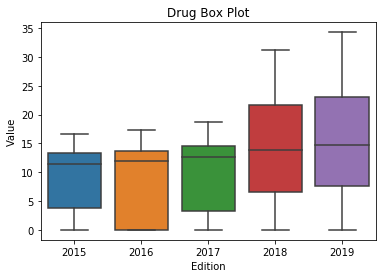

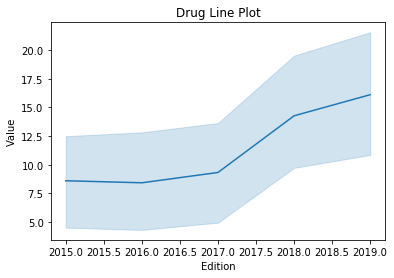

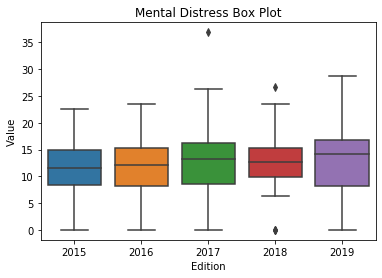

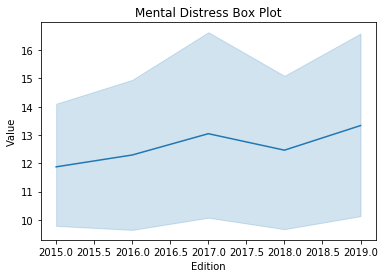

In [24]:
# Mental

men_dis_datalist = ['Frequent Mental Distress - Rural',
       'Frequent Mental Distress - $25-$49,999',
       'Frequent Mental Distress - $50-$74,999',
       'Frequent Mental Distress - $75,000 or More',
       'Frequent Mental Distress - Ages 18-44',
       'Frequent Mental Distress - Ages 45-64',
       'Frequent Mental Distress - Ages 65+',
       'Frequent Mental Distress - American Indian/Alaskan Native',
       'Frequent Mental Distress - Asian',
       'Frequent Mental Distress - Black',
       'Frequent Mental Distress - College Grad',
       'Frequent Mental Distress - Female',
       'Frequent Mental Distress - Hawaiian/Pacific Islander',
       'Frequent Mental Distress - High School Grad',
       'Frequent Mental Distress - Hispanic',
       'Frequent Mental Distress - Less Than $25,000',
       'Frequent Mental Distress - Less Than High School',
       'Frequent Mental Distress - Male',
       'Frequent Mental Distress - Multiracial',
       'Frequent Mental Distress - Other Race',
       'Frequent Mental Distress - Some College','Frequent Mental Distress - Suburban',
       'Frequent Mental Distress - Urban',]

drug_datalist = ['Drug Deaths', 'Drug Deaths - Ages 15-24',
       'Drug Deaths - Ages 25-34', 'Drug Deaths - Ages 35-44',
       'Drug Deaths - Ages 45-54', 'Drug Deaths - Ages 55-64',
       'Drug Deaths - Ages 65-74',
       'Drug Deaths - American Indian/Alaska Native',
       'Drug Deaths - Asian/Pacific Islander',
       'Drug Deaths - Black/African American', 'Drug Deaths - Female',
       'Drug Deaths - Hispanic/Latino', 'Drug Deaths - Male',
       'Drug Deaths - White', 'Frequent Mental Distress']

drug = sui[filt2][sui.Measure_Name.isin(drug_datalist)]

men_dis = sui[filt2][sui.Measure_Name.isin(men_dis_datalist)]

print("Mental distress and drug abuse seem to show the most parallel data with the suicide data. This data makes you want to dive deeper and discover if there is any link between drug abuse, suicide and mental distress.")

print("Drug abuse data seem to be slowly rising, and mental distress data seem to be a little more constant.")

plt.title("Drug Box Plot")
sns.boxplot(x = 'Edition', y = 'Value', data = drug[filt2])
plt.show()

plt.title("Drug Line Plot")
sns.lineplot(x = 'Edition', y = 'Value', data = drug)
plt.show()

plt.title("Mental Distress Box Plot")
sns.boxplot(x = 'Edition', y = 'Value', data = men_dis[filt2])
plt.show()

plt.title("Mental Distress Box Plot")
sns.lineplot(x = 'Edition', y = 'Value', data = men_dis)
plt.show()

See no correlation with the suicide data. In 2018, the youth disconnection and adverse childhood was the highest.


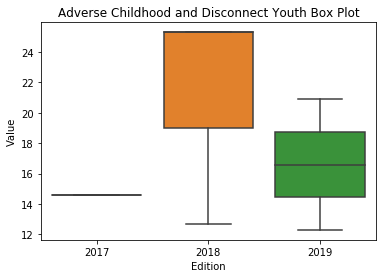

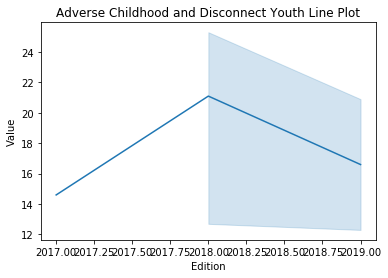

In [25]:
# Emotional

emotional_datalist = ['Adverse Childhood Experiences', 'Disconnected Youth']

emot = sui[filt2][sui.Measure_Name.isin(emotional_datalist)]

print("See no correlation with the suicide data. In 2018, the youth disconnection and adverse childhood was the highest.")

plt.title("Adverse Childhood and Disconnect Youth Box Plot")
sns.boxplot(x = 'Edition', y = 'Value', data = emot[filt2])
plt.show()

plt.title("Adverse Childhood and Disconnect Youth Line Plot")
sns.lineplot(x = 'Edition', y = 'Value', data = emot)
plt.show()

In [8]:
# Insights

print("According to the plots shown above, deaths pertaining to drugs and mental distress seem to show to most correlated with the suicide statistics. While the unemployment statistics seem to show a negative correlation with the suicide statistics.")

According to the plots shown above, deaths pertaining to drugs and mental distress seem to show to most correlated with the suicide statistics. While the unemployment statistics seem to show a negative correlation with the suicide statistics.
